# Clustering ML Repo
> Effect of embedding type and dimension on accuracy of clustering for classification tasks in ML Repo

In [2]:
%load_ext autoreload
%autoreload 2

import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clustering must allow custom distance metric
# from sklearn.cluster import AgglomerativeClustering
# from sklearn.metrics import pairwise_distances
from util import cluster, mixture_embedding, load_task
from util import cluster_exeriment as experiment

# Label tokens
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import adjusted_rand_score, accuracy_score

from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


INFO: Using numpy backend


In [3]:
# def load_task(dd, subdir, **embed_kwargs) -> (pd.DataFrame, pd.DataFrame):
#     # name = data_path.split("/")[-1]
#     data_path = f"{dd}/{subdir}"
#     # Get OTU table
#     otu_path = f"{data_path}/otus.txt"
#     otu_table = pd.read_table(otu_path, dtype={0: str})
#     otu_table = otu_table.set_index(otu_table.columns[0])
#     otu_table = otu_table.T
#     otu_table = otu_table / otu_table.sum()
#     X = otu_table
#     # print(X)

#     # Tokenize labels
#     labels_path = f"{data_path}/labels.txt"
#     labels = pd.read_table(labels_path, dtype={0: str})
#     labels = labels.set_index(labels.columns[0])
#     if "ControlVar" in labels.columns:
#         labels = labels.drop("ControlVar", axis=1)
#     label_encoder = OrdinalEncoder()
#     label_encoder.fit(labels)
#     y = label_encoder.transform(labels)
#     if y.shape[1] == 1:
#         y = y.ravel()
#     y = pd.Series(y, index=labels.index)
#     # print(y)

#     # Ensure agreement:
#     shared_samples = X.index.intersection(y.index)
#     if len(shared_samples) < len(X.index):
#         print(f"{subdir}: Dropping samples from X, {len(X.index)} --> {len(shared_samples)}")
#     if len(shared_samples) < len(y.index):
#         print(f"{subdir}: Dropping samples from y, {len(y.index)} --> {len(shared_samples)}")
#     X = X.loc[shared_samples]
#     y = y.loc[shared_samples]

#     return X, y

# def experiment(X, y, euc_embeddings, hyp_embeddings):
#     """For a dataset and a known dimensionality, get cluster scores"""
#     hyp_dim = hyp_embeddings.shape[1]
#     euc_dim = euc_embeddings.shape[1]
#     assert hyp_dim == euc_dim

#     pca_dim = np.min([hyp_dim, X.shape[0]])

#     X_raw = X.copy()
#     X_pca = PCA(n_components=pca_dim).fit_transform(X)
#     X_euc = mixture_embedding(
#         X, euc_embeddings, geometry="euclidean", max_iter=1000
#     )
#     X_hyp = mixture_embedding(
#         X, hyp_embeddings, geometry="hyperbolic", max_iter=1000, hyperboloid=True
#     )

#     # Cluster
#     # out_df = pd.DataFrame(columns=["name", "dim", "type", "ARI", "accuracy"])
#     out = []
#     for X, name in zip([X_raw, X_pca, X_euc, X_hyp], ["raw", "pca", "euc", "hyp"]):
#         print("number of nans:", np.isnan(X).sum().sum())
#         print("max number of nans:", X.shape[0] * X.shape[1])
#         _, y_pred = cluster(X, n_clusters=2, labels=y)
#         # print(name, "Y SHAPES:", y_pred.shape, y.shape)

#         out.append({
#             "dim": hyp_dim,
#             "type": name,
#             "ARI": adjusted_rand_score(y_pred, y),
#             "accuracy": accuracy_score(y_pred, y)
#         })

#     return out

In [4]:
# dd = "../../data/interim/mlrepo_clean/classification/"
# big_df = pd.DataFrame(columns=["name", "dim", "type", "ARI", "accuracy"])
# # for embed_dim in [16, 128]:
# for embed_dim in [4, 8, 16, 32, 64, 128]:
#     # Get embeddings
#     euc_embeddings = pd.read_csv(
#         f"~/DATA/otu_embeddings/embeddings_euclidean_{embed_dim}.csv", 
#         dtype={0: str}
#     )
#     euc_embeddings = euc_embeddings.set_index(euc_embeddings.columns[0])
#     hyp_embeddings = pd.read_csv(
#         f"~/DATA/otu_embeddings/embeddings_hyperbolic_{embed_dim}.csv", 
#         dtype={0: str}
#     )
#     hyp_embeddings = hyp_embeddings.set_index(hyp_embeddings.columns[0])

#     # Run experiment
#     for subdir in tqdm(os.listdir(dd)):
#         if not os.path.isdir(f"{dd}/{subdir}"):
#             continue

#         # Get data
#         X, y = load_task(dd, subdir)

#         # Run experiment
#         # Pandas 2.0 does not support appending:
#         # Also, suppress stdout during experiment
#         try:
#             out_df = pd.DataFrame(
#                 experiment(X, y, euc_embeddings, hyp_embeddings)
#             )

#             out_df["name"] = subdir
#             big_df = pd.concat([big_df, out_df])
#         except Exception as e:
#             print(e)
#             continue

# big_df.to_csv("../../data/processed/mlrepo_scores.csv")

big_df = pd.read_csv("../../data/processed/mlrepo_scores.csv", index_col=0)

<Axes: title={'center': 'accuracy'}, xlabel='[type, dim]'>

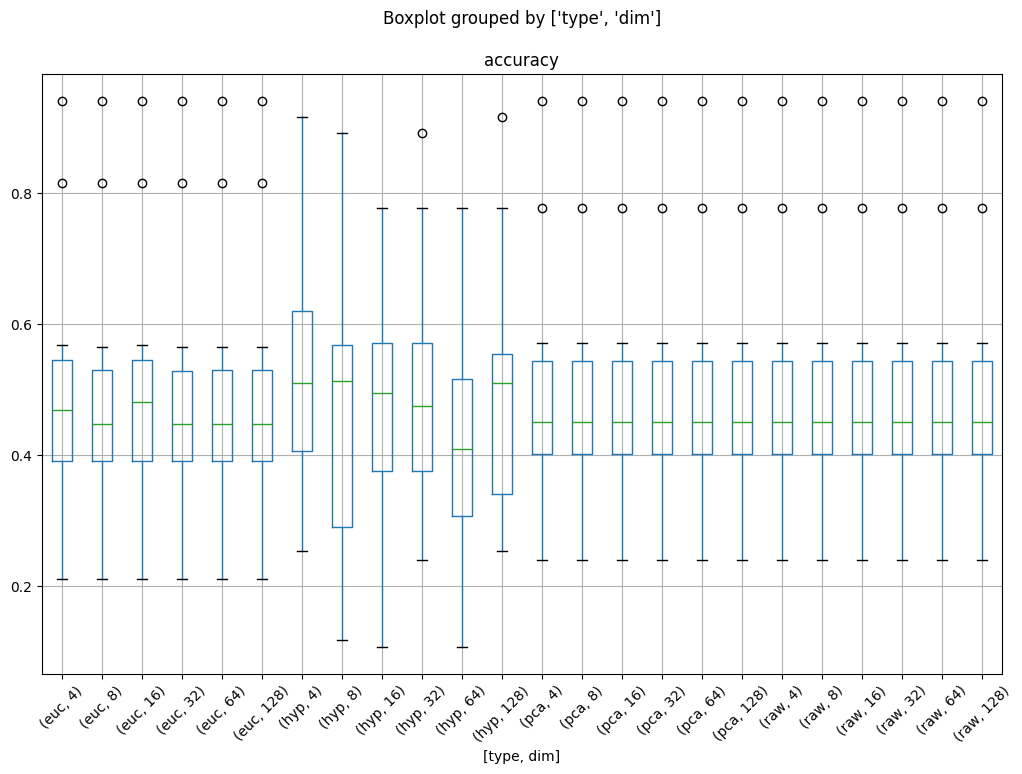

In [6]:
# Plot 8 boxplots on same figure

big_df.boxplot(
    column="accuracy", by=["type", "dim"], figsize=(12, 8), rot=45
)

<Axes: title={'center': 'ARI'}, xlabel='[type, dim]'>

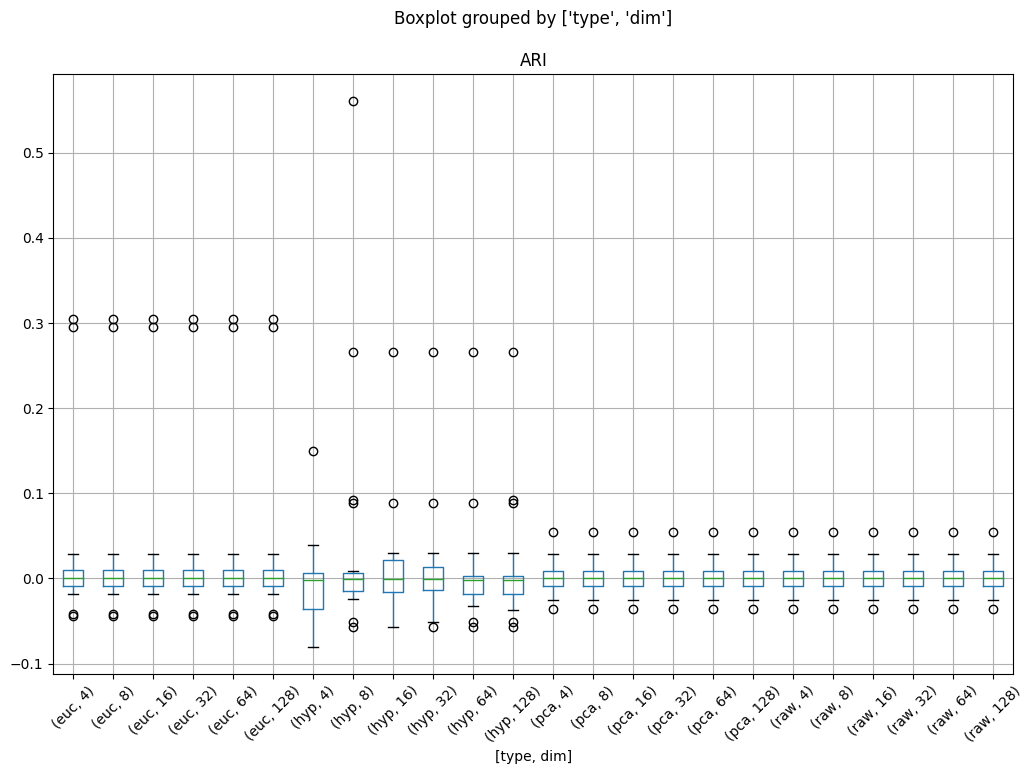

In [7]:
# Plot 8 boxplots on same figure

big_df.boxplot(
    column="ARI", by=["type", "dim"], figsize=(12, 8), rot=45
)